In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data_processed_4039.csv")
df

,date,name,obs_type,SPREAD*_lag._60._True*_diff._percentage._250*_scale._standardize*_lag._2._False,SPREAD*_lag._60._True*_diff._percentage._60*_s_m_a._60*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._5*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._250*_scale._standardize*_lag._1._False,SPREAD*_lag._60._True*_diff._percentage._60*_s_m_a._250*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._1*_rolling_vol._20*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._250*_scale._standardize*_lag._20._False,...,SPREAD*_lag._60._True*_diff._percentage._1*_rolling_vol._250*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._250*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._250*_s_m_a._250*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._60*_scale._standardize*_lag._20._False,SPREAD*_lag._60._True*_diff._percentage._20*_rolling_vol._100*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._20*_s_m_a._20*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._60*_rolling_vol._100*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._1*_s_m_a._10*_scale._standardize,SPREAD*_lag._60._True*_diff._percentage._125*_rolling_vol._250*_scale._standardize,SPREAD*_diff._percentage._60*_scale._standardize*_categorized
0,2009-04-07,Argentina,train,3.465146,1.093271,0.838450,3.468209,-1.055858,-0.096072,5.263622,...,0.448760,3.508586,2.005297,7.583610,0.140940,-0.523494,2.877791,-0.349160,2.340301,2
1,2009-04-07,Belize,train,2.197069,3.097415,0.206183,2.223216,0.797173,-0.072140,2.088717,...,-0.338656,2.254131,1.487411,3.889738,1.845109,3.720705,2.861689,-0.155440,2.000601,1
2,2009-04-07,Brazil,train,1.314545,-0.393289,2.307638,1.495876,-1.476480,0.487399,2.924639,...,0.535712,1.608366,0.661983,3.632180,-0.626278,-1.650371,0.826042,0.456984,2.234712,0
3,2009-04-07,Chile,train,2.645543,1.092243,1.373641,2.677408,-1.496341,-0.702430,3.329133,...,-0.125385,2.750292,1.153625,4.302419,0.194571,-0.160452,2.436845,0.952808,2.322859,0
4,2009-04-07,China,train,0.293065,-0.650292,0.037232,0.353988,-1.209648,-0.409883,0.958938,...,0.510657,0.451841,-0.429105,0.715332,-0.278400,-0.376170,-0.200954,-0.853027,0.431576,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106363,2021-12-31,Trinidad & T.,test2,-0.360273,-0.063852,0.248616,-0.380597,-0.679389,0.152512,-0.626745,...,-0.241853,-0.387475,-0.425036,-0.150094,-0.286735,-0.006530,-0.403754,0.516586,-0.257851,2
106364,2021-12-31,Tunisia,test2,0.098873,1.427477,0.810877,0.025477,0.458615,0.213374,-0.103426,...,-0.119753,0.005344,-0.066210,1.356930,0.415107,0.861772,0.767963,0.903147,-0.400610,2
106365,2021-12-31,Turkey,test2,-0.454937,0.055937,-0.323506,-0.549359,-0.348527,-1.477812,-0.750970,...,-1.626720,-0.530399,-0.476494,-0.108631,-2.181860,0.712770,-1.627621,-0.112122,-1.105793,2
106366,2021-12-31,Uruguay,test2,-0.287267,0.436924,-0.188782,-0.383069,-0.219463,-0.415049,-0.862608,...,-1.481877,-0.417490,-1.108765,-0.130611,-1.136461,0.364608,-1.044223,0.585612,-0.734328,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106368 entries, 0 to 106367
Data columns (total 25 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   date                                                                                106368 non-null  object 
 1   name                                                                                106368 non-null  object 
 2   obs_type                                                                            106368 non-null  object 
 3   SPREAD*_lag._60._True*_diff._percentage._250*_scale._standardize*_lag._2._False     106368 non-null  float64
 4   SPREAD*_lag._60._True*_diff._percentage._60*_s_m_a._60*_scale._standardize          106368 non-null  float64
 5   SPREAD*_lag._60._True*_diff._percentage._5*_scale._standardize                      10

In [4]:
# Removal of the target variables
targets_to_remove = [
    'SPREAD*_diff._percentage._60*_scale._standardize',
    'SPREAD*_diff._percentage._60*_scale._standardize*_categorized'
]
df = df.drop(columns=targets_to_remove)

Explained variance: [0.29224913 0.18023431 0.13029942 0.10781026 0.06511235 0.05493275
 0.03432318 0.03001824 0.02613728 0.01657011 0.01474993 0.01094541
 0.00902342 0.00843606 0.00524197 0.00515897 0.0027941  0.00235355
 0.00200578 0.00160379]


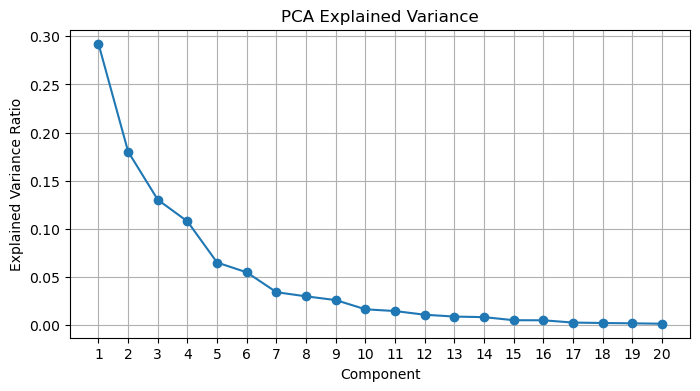

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Separate the data into training and test data.
train_df = df[df['obs_type'] == 'train']
test_df = df[df['obs_type'] == 'test2']

# Prepare features (remove non-numeric columns like date and name)
features_cols = [col for col in df.columns if col not in ['date', 'name', 'obs_type'] + targets_to_remove]
X_train = train_df[features_cols].values
X_test = test_df[features_cols].values
# Data StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explanation of variance
explained_variance = pca.explained_variance_ratio_
print('Explained variance:', explained_variance)

# plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()

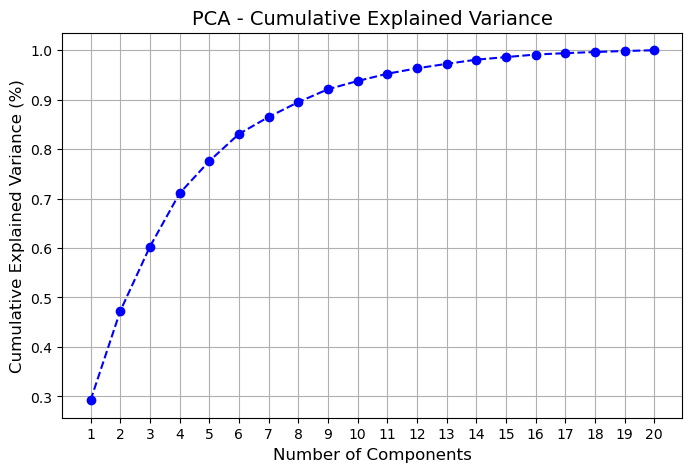

In [6]:
# Explained variance ratio
cumulative_variance = np.cumsum(explained_variance) 

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=12)
plt.title('PCA - Cumulative Explained Variance', fontsize=14)
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))  # Ensure x-axis uses integer values
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model,Input


In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks
import pandas as pd
import numpy as np
latent_dim = 17
def vae():
    leaky_relu = keras.layers.LeakyReLU()
    # Dimensions
    input_dim = X_train_scaled.shape[1]
    beta = 0.0001
    # Encoder
    encoder_inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(512, kernel_regularizer=keras.regularizers.l2(1e-5))(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(leaky_relu)(x)
    x = layers.Dropout(0.5)(x)



    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z])

    # Decoder
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(512)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(leaky_relu)(x)

    
    
    decoder_outputs = layers.Dense(input_dim, activation="linear")(x)

    decoder = keras.Model(latent_inputs, decoder_outputs)

    # VAE Class
    class VAE(keras.Model):
        def __init__(self, encoder, decoder, beta, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.encoder = encoder
            self.decoder = decoder
            self.beta = beta

        def train_step(self, data):
            if isinstance(data, tuple):
                data = data[0]

            with tf.GradientTape() as tape:
                z_mean, z_log_var, z = self.encoder(data)
                reconstruction = self.decoder(z)

                reconstruction_loss = tf.reduce_mean(
                    keras.losses.mae(data, reconstruction)
                ) * input_dim

                kl_loss = -0.5 * tf.reduce_mean(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
                ) * self.beta

                total_loss = reconstruction_loss + kl_loss

            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

            return {"train_loss": total_loss}

        def test_step(self, data):
            if isinstance(data, tuple):
                data = data[0]

            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                keras.losses.mae(data, reconstruction)
            ) * input_dim

            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            ) * self.beta

            total_loss = reconstruction_loss + kl_loss

            return {"val_loss": total_loss}

    return VAE(encoder, decoder, beta=beta),encoder,decoder
vae,VAEencoder,VAEdecoder=vae()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-4,
    decay_steps=10000,
    decay_rate=0.9
)

vae.compile(optimizer = keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=1.0))


tensorboard_cb = keras.callbacks.TensorBoard(log_dir='./logs')
history = vae.fit(
    X_train_scaled, X_train_scaled,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, X_test_scaled),
    callbacks=[tensorboard_cb],verbose=1
)

Epoch 1/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - train_loss: 1.8916 - val_val_loss: 1.7535
Epoch 2/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.7058 - val_val_loss: 1.6072
Epoch 3/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.6156 - val_val_loss: 1.3063
Epoch 4/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.5700 - val_val_loss: 1.2283
Epoch 5/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.5374 - val_val_loss: 1.2906
Epoch 6/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.5130 - val_val_loss: 1.1580
Epoch 7/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - train_loss: 0.4935 - val_val_loss: 1.1632
Epoch 8/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - train_loss: 0.4778 - val_val_loss: 1.1460
Epoch 9/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - train_loss: 0.4628 - val_val_loss: 1.1105
Epoch 10/20
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - train_loss: 0.4508 - val_val_loss: 1.1813
Epoch 11/20
1888/18

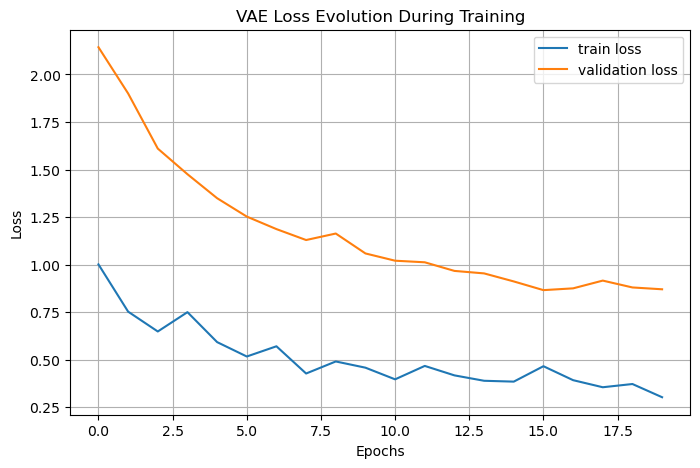

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['train_loss'], label='train loss')
plt.plot(history.history['val_val_loss'], label='validation loss')
plt.title('VAE Loss Evolution During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [64]:
# Get latent representations for train and test sets
train_z_mean, _, train_z = VAEencoder.predict(X_train_scaled)
test_z_mean, _, test_z = VAEencoder.predict(X_test_scaled)
# Save latent representations
np.save("train_latent.npy", train_z)
np.save("test_latent.npy", test_z)

1888/1888 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [65]:
train_reconstructions = VAEdecoder.predict(train_z)
test_reconstructions = VAEdecoder.predict(test_z)
#Reconstruction Error
train_recon_error = np.mean(np.abs(X_train_scaled - train_reconstructions), axis=1)
test_recon_error = np.mean(np.abs(X_test_scaled - test_reconstructions), axis=1)

# Average errors
print(f"Train Reconstruction Error (Mean): {np.mean(train_recon_error):.4f}")
print(f"Test Reconstruction Error (Mean): {np.mean(test_recon_error):.4f}")

1888/1888 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
Train Reconstruction Error (Mean): 0.0184
Test Reconstruction Error (Mean): 0.0848


Epoch 1/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2596 - val_loss: 0.3322
Epoch 2/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1912 - val_loss: 0.2671
Epoch 3/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1855 - val_loss: 0.2753
Epoch 4/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1783 - val_loss: 0.3111
Epoch 5/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1768 - val_loss: 0.2541
Epoch 6/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1739 - val_loss: 0.2354
Epoch 7/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1704 - val_loss: 0.2329
Epoch 8/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1678 - val_loss: 0.2277
Epoch 9/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1659 - val_loss: 0.2301
Epoch 10/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1634 - val_loss: 0.2120
Epoch 11/50
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1615 - val_loss: 0.2362
Epoch 12/50
1888/1888 ━━━━━━━━

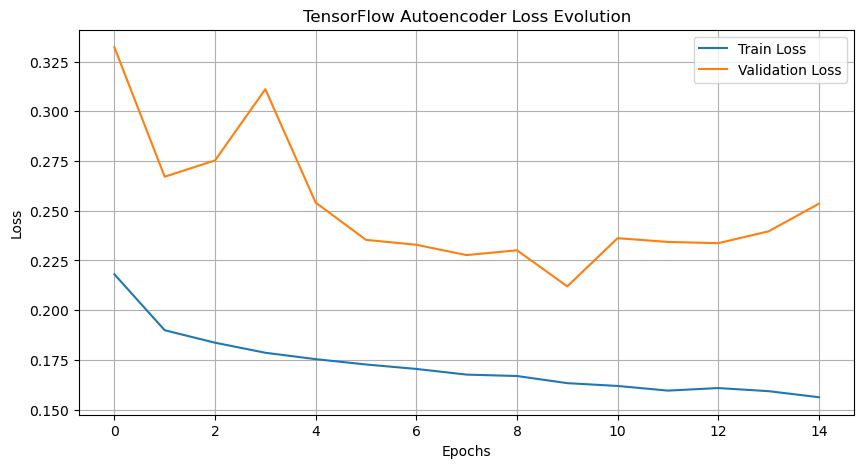

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models, regularizers
import matplotlib.pyplot as plt
latent_dim=17
def TF_autoencoder():
    input_dim = X_train_scaled.shape[1]
    
    input_layer = keras.Input(shape=(input_dim,))
    
    # Encoder
    x = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5))(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    #x = layers.Dropout(0.2)(x)



    
    encoded = layers.Dense(latent_dim, name="latent_vector")(x)
    
    # Decoder
    x = layers.Dense(512)(encoded)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    
    output_layer = layers.Dense(input_dim, activation="linear")(x)
    
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    
    return autoencoder
tf_autoencoder=TF_autoencoder()


early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-4,
    decay_steps=10000,
    decay_rate=0.9
)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
tf_autoencoder.compile(optimizer=opt, loss=keras.losses.mae)
tensorboard_cb = callbacks.TensorBoard(log_dir='./logs')
history=tf_autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_test_scaled, X_test_scaled),
                          callbacks=[ tensorboard_cb,early_stop],
                          verbose=1)



# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Autoencoder Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

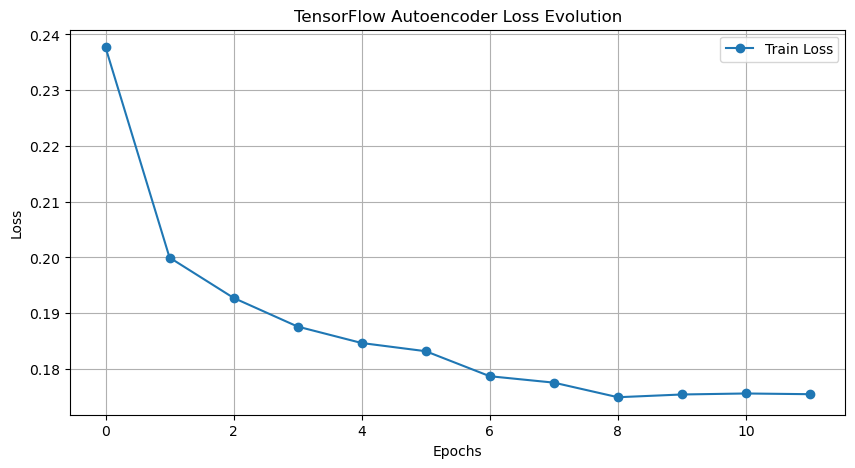

In [67]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
#plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('TensorFlow Autoencoder Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Get the input and the latent vector layer's output
encoder = keras.Model(inputs=tf_autoencoder.input,
                      outputs=tf_autoencoder.get_layer('latent_vector').output)
train_latent_representations = encoder.predict(X_train_scaled)
test_latent_representations = encoder.predict(X_test_scaled)

# Save them if needed
np.save("train_latent_representations.npy", train_latent_representations)
np.save("test_latent_representations.npy", test_latent_representations)

print("Latent representations saved!")
# Reconstruct train and test data
tf_autoencoder_train_reconstructions = tf_autoencoder.predict(X_train_scaled)
tf_autoencoder_test_reconstructions = tf_autoencoder.predict(X_test_scaled)

#Reconstruction Error
train_recon_error = np.mean(np.abs(X_train_scaled - tf_autoencoder_train_reconstructions), axis=1)
test_recon_error = np.mean(np.abs(X_test_scaled - tf_autoencoder_test_reconstructions), axis=1)

# Average errors
print(f"Train Reconstruction Error for TF autoencoder(Mean): {np.mean(train_recon_error):.4f}")
print(f"Test Reconstruction Error for TF autoencoder(Mean): {np.mean(test_recon_error):.4f}")

1888/1888 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
Latent representations saved!
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Reconstruction Error for TF autoencoder(Mean): 0.0659
Test Reconstruction Error for TF autoencoder(Mean): 0.2114


Epoch [1/10], Train Loss: 0.3261, Val Loss: 0.4756
Epoch [2/10], Train Loss: 0.2374, Val Loss: 0.3393
Epoch [3/10], Train Loss: 0.2187, Val Loss: 0.2985
Epoch [4/10], Train Loss: 0.2102, Val Loss: 0.2896
Epoch [5/10], Train Loss: 0.2056, Val Loss: 0.2486
Epoch [6/10], Train Loss: 0.2018, Val Loss: 0.2804
Epoch [7/10], Train Loss: 0.2001, Val Loss: 0.2304
Epoch [8/10], Train Loss: 0.1967, Val Loss: 0.2626
Epoch [9/10], Train Loss: 0.1968, Val Loss: 0.2247
Epoch [10/10], Train Loss: 0.1947, Val Loss: 0.2415


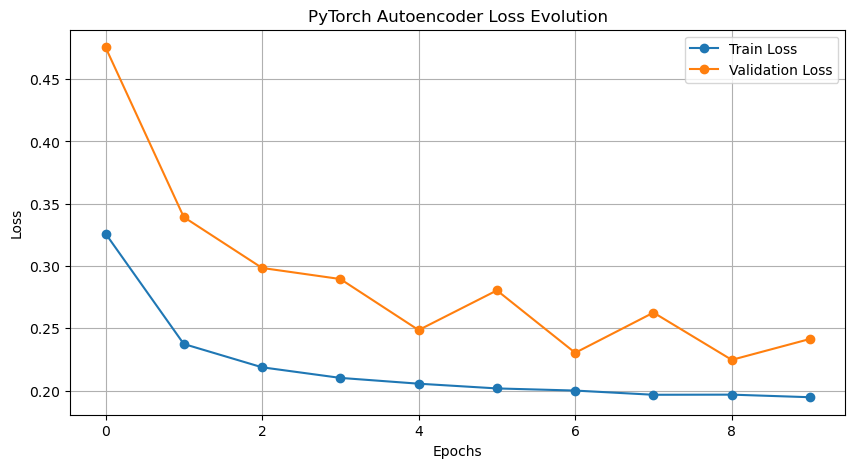

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
latent_dim = 17
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Convert data to FloatTensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
def PT_autoencoder():
    # Autoencoder with deeper architecture and dropout
    class Autoencoder(nn.Module):
        def __init__(self, input_dim):
            super(Autoencoder, self).__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
                nn.Dropout(0.3),
            
               
                nn.Linear(512, latent_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
            
                nn.Linear(512, input_dim)
            )

        def forward(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    input_dim = X_train_scaled.shape[1]
    model = Autoencoder(input_dim).to(device)
    return model
pt_autoencoder=PT_autoencoder()
criterion = nn.L1Loss()
initial_lr = 5e-5
optimizer = optim.Adam(pt_autoencoder.parameters(), lr=initial_lr, weight_decay=1e-4)

# Exponential decay scheduler in PyTorch
gamma = 0.9  # Decay rate
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    pt_autoencoder.train()
    train_loss = 0
    for batch in train_loader:
        inputs = batch[0]

        outputs = pt_autoencoder(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    pt_autoencoder.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = batch[0]
            outputs = pt_autoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Step the scheduler
    scheduler.step(avg_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('PyTorch Autoencoder Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


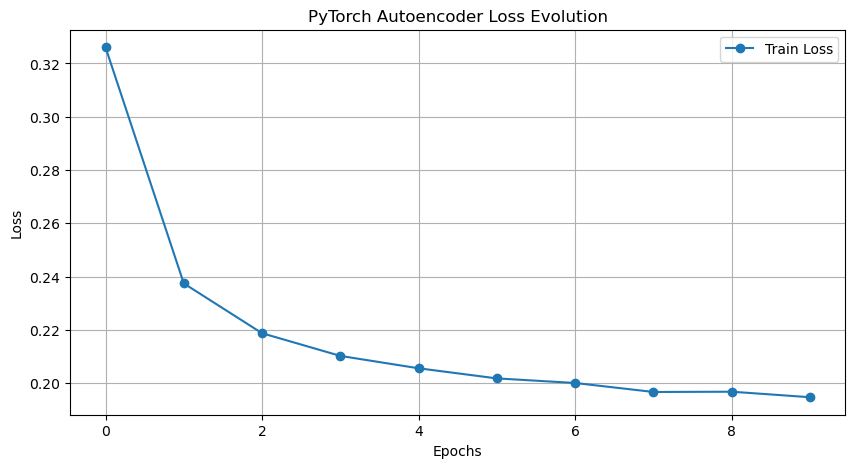

In [90]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
#plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('PyTorch Autoencoder Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Set the model to evaluation mode
pt_autoencoder.eval()

# Get latent representations for the train set
with torch.no_grad():
    train_latents = pt_autoencoder.encoder(X_train_tensor).cpu().numpy()
    test_latents = pt_autoencoder.encoder(X_test_tensor).cpu().numpy()

# Save latent representations if needed
np.save("PT_train_latent_representations.npy", train_latents)
np.save("PT_test_latent_representations.npy", test_latents)

print("Latent representations saved!")

# Reconstruct the data
with torch.no_grad():
    train_reconstructions = pt_autoencoder(X_train_tensor).cpu().numpy()
    test_reconstructions = pt_autoencoder(X_test_tensor).cpu().numpy()

# Initialize the same loss function
recon_criterion = nn.L1Loss(reduction='none')

# Convert to tensors (detach from GPU if needed)
X_train_tensor_cpu = X_train_tensor.cpu()
X_test_tensor_cpu = X_test_tensor.cpu()

train_recons_tensor = torch.tensor(train_reconstructions, dtype=torch.float32)
test_recons_tensor = torch.tensor(test_reconstructions, dtype=torch.float32)

# Compute element-wise loss (no reduction)
train_errors = recon_criterion(train_recons_tensor, X_train_tensor_cpu)
test_errors = recon_criterion(test_recons_tensor, X_test_tensor_cpu)

# Sum across features to get per-sample reconstruction error
train_recon_error = train_errors.mean(dim=1).numpy()
test_recon_error = test_errors.mean(dim=1).numpy()

print(f"Train Reconstruction Error PT autoencoder Mean: {np.mean(train_recon_error):.4f}")
print(f"Test Reconstruction Error PT autoencoder Mean: {np.mean(test_recon_error):.4f}")

Latent representations saved!
Train Reconstruction Error PT autoencoder Mean: 0.0822
Test Reconstruction Error PT autoencoder Mean: 0.2415


In [98]:
pca_components = [2, 5, 10, 17, 20]
residual_variances_pca = []

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    pca.fit(X_test_scaled)
    explained_var = np.sum(pca.explained_variance_ratio_)
    residual_var = 1 - explained_var
    residual_variances_pca.append(residual_var)

    print(f"PCA - Components: {n_components}, Explained Variance: {explained_var:.4f}, Residual Variance: {residual_var:.4f}")

PCA - Components: 2, Explained Variance: 0.6578, Residual Variance: 0.3422
PCA - Components: 5, Explained Variance: 0.9036, Residual Variance: 0.0964
PCA - Components: 10, Explained Variance: 0.9798, Residual Variance: 0.0202
PCA - Components: 17, Explained Variance: 0.9988, Residual Variance: 0.0012
PCA - Components: 20, Explained Variance: 1.0000, Residual Variance: 0.0000


In [94]:

from sklearn.metrics import explained_variance_score
def compute_residual_variance(original_data, reconstructed_data):
    explained_var = explained_variance_score(original_data, reconstructed_data, multioutput='variance_weighted')
    residual_var = 1 - explained_var
    return explained_var, residual_var

In [96]:
from sklearn.metrics import explained_variance_score


latent_dims = [2, 5, 10, 17, 20]
VAEexplained_variances = []
VAEresidual_variances = []

for latent_dim in latent_dims:
    print(f"Training VAE with latent_dim = {latent_dim}")
    leaky_relu = keras.layers.LeakyReLU()
    # Dimensions
    input_dim = X_train_scaled.shape[1]
    beta = 0.0001
    # Encoder
    encoder_inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(512, kernel_regularizer=keras.regularizers.l2(1e-5))(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(leaky_relu)(x)
    x = layers.Dropout(0.5)(x)



    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z])

    # Decoder
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(512)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(leaky_relu)(x)

    
    decoder_outputs = layers.Dense(input_dim, activation="linear")(x)

    decoder = keras.Model(latent_inputs, decoder_outputs)

    # VAE Class
    class VAE(keras.Model):
        def __init__(self, encoder, decoder, beta, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.encoder = encoder
            self.decoder = decoder
            self.beta = beta

        def train_step(self, data):
            if isinstance(data, tuple):
                data = data[0]

            with tf.GradientTape() as tape:
                z_mean, z_log_var, z = self.encoder(data)
                reconstruction = self.decoder(z)

                reconstruction_loss = tf.reduce_mean(
                    keras.losses.mae(data, reconstruction)
                ) * input_dim

                kl_loss = -0.5 * tf.reduce_mean(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
                ) * self.beta

                total_loss = reconstruction_loss + kl_loss

            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

            return {"train_loss": total_loss}

        def test_step(self, data):
            if isinstance(data, tuple):
                data = data[0]

            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                keras.losses.mae(data, reconstruction)
            ) * input_dim

            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            ) * self.beta

            total_loss = reconstruction_loss + kl_loss

            return {"val_loss": total_loss}
    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer = keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=1.0))
    
    vae.fit(
        X_train_scaled, X_train_scaled,
        epochs=10,
        batch_size=32,
        validation_data=(X_test_scaled, X_test_scaled),
        callbacks=[early_stop, reduce_lr, tensorboard_cb],
        verbose=0  # Hide training logs for simplicity
    )

    # Reconstruction on test data
    z_mean, _, _ = encoder.predict(X_test_scaled)
    X_test_reconstructed = decoder.predict(z_mean)

    # Calculate explained and residual variance
    explained_var, residual_var = compute_residual_variance(X_test_scaled, X_test_reconstructed)
    VAEexplained_variances.append(explained_var)
    VAEresidual_variances.append(residual_var)

    print(f"VAE - Latent Dim: {latent_dim}, Explained Variance: {explained_var:.4f}, Residual Variance: {residual_var:.4f}")


Training VAE with latent_dim = 2


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss
  current = self.get_monitor_value(logs)
C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
VAE - Latent Dim: 2, Explained Variance: 0.2444, Residual Variance: 0.7556
Training VAE with latent_dim = 5


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss
  current = self.get_monitor_value(logs)
C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
VAE - Latent Dim: 5, Explained Variance: 0.4815, Residual Variance: 0.5185
Training VAE with latent_dim = 10


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss
  current = self.get_monitor_value(logs)
C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
VAE - Latent Dim: 10, Explained Variance: 0.8821, Residual Variance: 0.1179
Training VAE with latent_dim = 17


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss
  current = self.get_monitor_value(logs)
C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
VAE - Latent Dim: 17, Explained Variance: 0.9974, Residual Variance: 0.0026
Training VAE with latent_dim = 20


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss
  current = self.get_monitor_value(logs)
C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: train_loss,val_val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
VAE - Latent Dim: 20, Explained Variance: 0.9991, Residual Variance: 0.0009


In [100]:
tfexplained_variances=[]
tfresidual_variances=[]
leaky_relu = keras.layers.LeakyReLU(alpha=0.1)
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models, regularizers
for latent_dim in latent_dims:
    print(f"Training TF autoencoder with latent_dim = {latent_dim}")
    input_dim = X_train_scaled.shape[1]
    
    input_layer = keras.Input(shape=(input_dim,))
    
    # Encoder
    x = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5))(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    #x = layers.Dropout(0.5)(x)

    
    encoded = layers.Dense(latent_dim, name="latent_vector")(x)
    
    # Decoder
    x = layers.Dense(512)(encoded)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)


    
    output_layer = layers.Dense(input_dim, activation="linear")(x)
    
    tf_autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

    tf_autoencoder.compile(optimizer=opt, loss=keras.losses.Huber(delta=1.0))

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    tensorboard_cb = callbacks.TensorBoard(log_dir='./logs')

    tf_autoencoder.fit(X_train_scaled, X_train_scaled,
                              epochs=10,
                              batch_size=64,
                              validation_data=(X_test_scaled, X_test_scaled),
                              callbacks=[early_stop, reduce_lr, tensorboard_cb],
                              verbose=1)
    reconstructed = tf_autoencoder.predict(X_test_scaled)
    explained_var, residual_var = compute_residual_variance(X_test_scaled, reconstructed)
    print(f"tf autoencoder - Latent Dim: {latent_dim}, Explained Variance: {explained_var:.4f}, Residual Variance: {residual_var:.4f}")
    tfexplained_variances.append(explained_var)
    tfresidual_variances.append(residual_var)

Training TF autoencoder with latent_dim = 2
Epoch 1/10


C:\Users\Yara\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


944/944 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2230 - val_loss: 1.0105 - learning_rate: 5.0000e-04
Epoch 2/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1894 - val_loss: 1.0032 - learning_rate: 5.0000e-04
Epoch 3/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1850 - val_loss: 0.9938 - learning_rate: 5.0000e-04
Epoch 4/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1820 - val_loss: 1.0177 - learning_rate: 5.0000e-04
Epoch 5/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1803 - val_loss: 1.0005 - learning_rate: 5.0000e-04
Epoch 6/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1791 - val_loss: 0.9642 - learning_rate: 5.0000e-04
Epoch 7/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1767 - val_loss: 1.0034 - learning_rate: 5.0000e-04
Epoch 8/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1764 - val_loss: 1.0192 - learning_rate: 5.0000e-04
Epoch 9/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1749 - val_loss: 1.0511 - learning_ra

In [105]:

from  keras.layers import LeakyReLU,BatchNormalization,Dropout
from tensorflow.keras import layers, callbacks, models, regularizers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

latent_dims = [2, 5, 10, 15, 20]
PTexplained_variances = []
PTresidual_variances = []

# Assuming you have these already defined:
# X_train_scaled, X_test_scaled, device

# Datasets and Loaders
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Custom function to compute variance
def compute_residual_variance(original, reconstructed):
    # Total variance in data
    total_var = np.var(original, axis=0).sum()
    
    # Residual variance between original and reconstructed
    residual_var = np.var(original - reconstructed, axis=0).sum()
    
    explained_var_ratio = 1 - (residual_var / total_var)
    
    return explained_var_ratio, (residual_var / total_var)

# Loop over different latent dimensions
for latent_dim in latent_dims:
    print(f"Training PT Autoencoder with latent dimension: {latent_dim}")

    class Autoencoder(nn.Module):
        def __init__(self, input_dim, latent_dim):
            super(Autoencoder, self).__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
                nn.Dropout(0.3),
                nn.Linear(512, latent_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
                nn.Linear(512, input_dim)
            )

        def forward(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    # Initialize model for this latent dimension
    input_dim = X_train_scaled.shape[1]
    model = Autoencoder(input_dim, latent_dim).to(device)

    criterion = nn.L1Loss()
    initial_lr = 5e-4  # Increased learning rate for better convergence
    optimizer = optim.Adam(model.parameters(), lr=initial_lr, weight_decay=1e-4)

    # Scheduler (no need to pass avg_val_loss here, ExponentialLR ignores it)
    gamma = 0.9
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

    # Train the model
    num_epochs = 50  # Try more epochs for better convergence
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        for batch in train_loader:
            inputs = batch[0]

            outputs = model(inputs)
            loss = criterion(outputs, inputs)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch[0]
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Step the scheduler
        scheduler.step()

        if epoch % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Evaluate explained/residual variance on the test set
    with torch.no_grad():
        reconstructed = model(X_test_tensor).cpu().numpy()

    explained_var, residual_var = compute_residual_variance(X_test_scaled, reconstructed)
    PTexplained_variances.append(explained_var)
    PTresidual_variances.append(residual_var)

    print(f"PT Autoencoder - Latent Dim: {latent_dim}, Explained Variance: {explained_var:.4f}, Residual Variance: {residual_var:.4f}")


Training PT Autoencoder with latent dimension: 2
Epoch [1/50], Train Loss: 0.5091, Val Loss: 1.3874
Epoch [11/50], Train Loss: 0.4586, Val Loss: 1.3810
Epoch [21/50], Train Loss: 0.4549, Val Loss: 1.3682
Epoch [31/50], Train Loss: 0.4520, Val Loss: 1.3421
Epoch [41/50], Train Loss: 0.4517, Val Loss: 1.3567
Epoch [50/50], Train Loss: 0.4524, Val Loss: 1.3424
PT Autoencoder - Latent Dim: 2, Explained Variance: 0.2331, Residual Variance: 0.7669
Training PT Autoencoder with latent dimension: 5
Epoch [1/50], Train Loss: 0.3560, Val Loss: 0.8984
Epoch [11/50], Train Loss: 0.3152, Val Loss: 0.9353
Epoch [21/50], Train Loss: 0.3103, Val Loss: 0.9388
Epoch [31/50], Train Loss: 0.3083, Val Loss: 0.9341
Epoch [41/50], Train Loss: 0.3091, Val Loss: 0.9266
Epoch [50/50], Train Loss: 0.3078, Val Loss: 0.9355
PT Autoencoder - Latent Dim: 5, Explained Variance: 0.5985, Residual Variance: 0.4015
Training PT Autoencoder with latent dimension: 10
Epoch [1/50], Train Loss: 0.2671, Val Loss: 0.5063
Epoch [

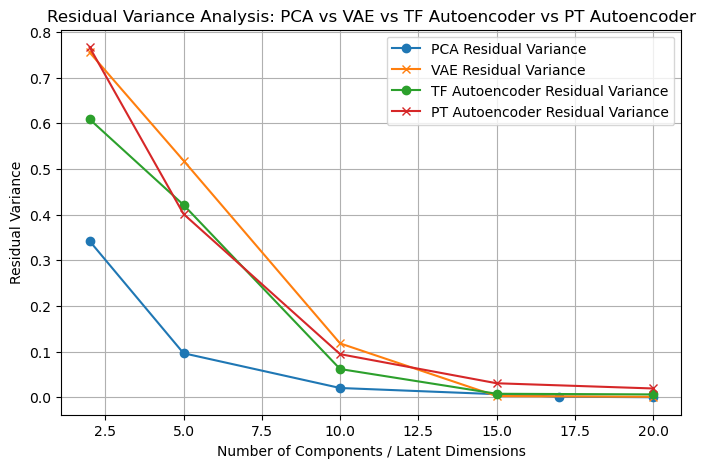

In [106]:
plt.figure(figsize=(8, 5))

plt.plot(pca_components, residual_variances_pca, marker='o', label='PCA Residual Variance')
plt.plot(latent_dims, VAEresidual_variances, marker='x', label='VAE Residual Variance')
plt.plot(latent_dims, tfresidual_variances, marker='o', label='TF Autoencoder Residual Variance')
plt.plot(latent_dims, PTresidual_variances, marker='x', label='PT Autoencoder Residual Variance')
plt.xlabel('Number of Components / Latent Dimensions')
plt.ylabel('Residual Variance')
plt.title('Residual Variance Analysis: PCA vs VAE vs TF Autoencoder vs PT Autoencoder')
plt.legend()
plt.grid(True)
plt.show()